In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_spec import create_spec
from fit2gauss import fit2gauss

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [3]:
wav,spec,error = create_spec(tube,frac,log10T,log10G,time=65) #350 -> single

/Users/WilliamHenryAshfieldIV/synth_spec/create_spec.py:98: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi
/Users/WilliamHenryAshfieldIV/synth_spec/create_spec.py:158: RuntimeWarning: invalid value encountered in sqrt
  meas_error = np.sqrt(tot_emissNEI) # error measured


In [4]:
#plt.figure(figsize=(12,8))
#plt.plot(wav,spec,wav,error)
#plt.xlim(1402,1405)

In [5]:
#noise = np.full(2000,0.001)
res = fit2gauss(wav,spec,error,verbose=True)

est params =  [743.5778633804285, 1403.3572220479346, 0.1, 8627.791147100295, 1402.9956406178212, 0.1]
single peak found
new init params =  [7847.517489812549, 1403.019999999991, 0.1, 8627.791147100295, 2.46001138390061e-12, 1404.1699999999898]
a2g[0] = 9389.851051750356
a1g[0] = 9389.919100471961
a2g =  [9.38991910e+03 1.40302434e+03 9.74529861e-02 0.00000000e+00
 1.40302434e+03 9.74529861e-02]
chi1g =  4.653204568444832
chi2g =  -1.0


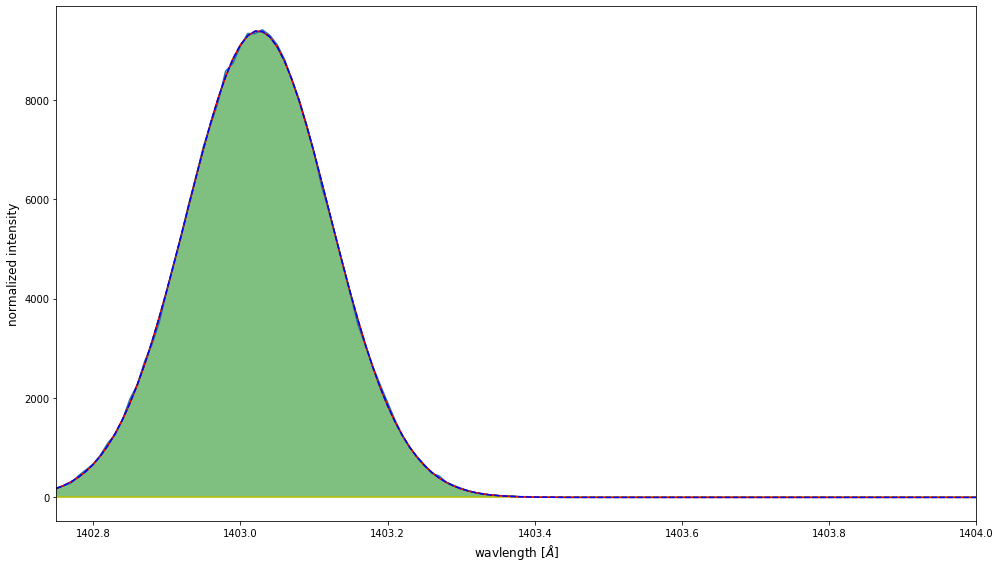

In [6]:
# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec)

# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wav,y2a+y2b, "r")

# single fit
ax1.plot(wav,y1g,'b--')
    
plt.xlim(1402.75,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [7]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1403
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  5.204915339318495 ----- "blue" velocity =  5.204915339318495


In [8]:
# single Gaussian
line = 1403
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  5.204915339318495


In [9]:
sig = a2g[5]
c = 300
line = 1402.77
freq = c/line*1e3
v_width = sig*freq
print('line width = ', v_width)

line width =  20.84154625453948


test for peak finding.

In [10]:
from scipy.signal import find_peaks

In [11]:
spec_sm = savgol_filter(spec, 21, 1)
peaks, _ = find_peaks(spec_sm)

(1402.75, 1404)

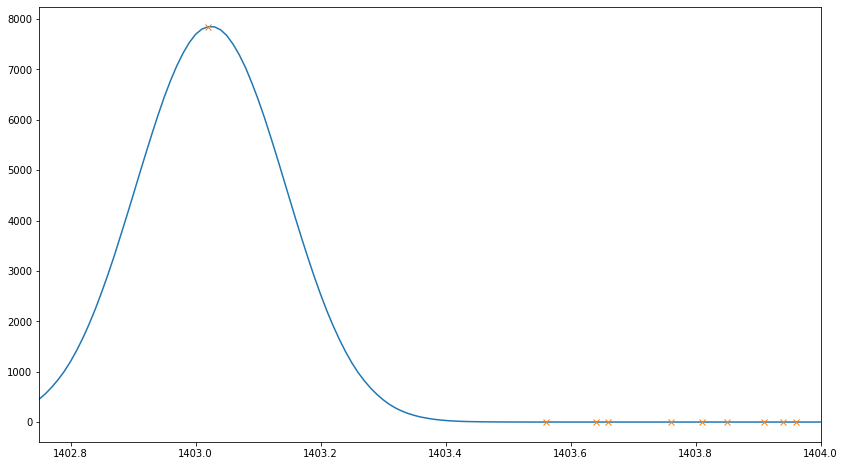

In [12]:
#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec_sm)
ax1.plot(wav[peaks], spec_sm[peaks], "x")
plt.xlim(1402.75,1404)

In [13]:
pos_peaks = wav[peaks]
spec_peaks = spec_sm[peaks]
iis = np.where(spec_peaks>1)
iis = iis[0]

In [14]:
iis

array([86])

In [15]:
amp_peaks = spec_peaks[iis]

In [16]:
pos = pos_peaks[iis]

In [17]:
np.append(iis,iis[0]+3)

array([86, 89])

In [18]:
len(iis)

1